**Analyzing two models-Isolation Forest and One class SVM for credit card fraud detection. Dataset from Kaggle.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
#Check for missing values
print("\nMissing Values per column:\n", df.isnull().sum())


Missing Values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
df=df.dropna()

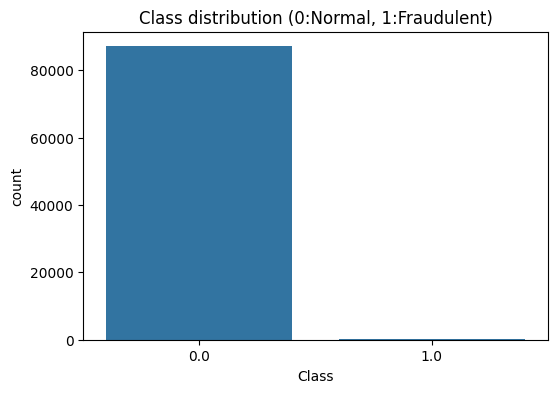

In [ ]:
#Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class distribution (0:Normal, 1:Fraudulent)")
plt.show()

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,...,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,87239.000000,8.723900e+04,87239.000000
mean,-0.264340,-0.039736,0.679481,0.163080,-0.277593,0.094179,-0.110135,0.054041,-0.025376,-0.030425,...,-0.029472,-0.106031,-0.037054,0.009686,0.132652,0.026722,0.000801,0.002105,-3.257913e-18,0.002350
std,1.876875,1.667207,1.359382,1.360920,1.372054,1.302524,1.233574,1.217704,1.131867,1.067904,...,0.729483,0.635050,0.624121,0.594797,0.441065,0.496992,0.390442,0.327910,1.000006e+00,0.048419
min,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,-3.680082e-01,0.000000
25%,-1.028020,-0.603074,0.184428,-0.720231,-0.897262,-0.645804,-0.602405,-0.140723,-0.691868,-0.502785,...,-0.223746,-0.525484,-0.177939,-0.321974,-0.131957,-0.326135,-0.063559,-0.005877,-3.392859e-01,0.000000
50%,-0.261447,0.070411,0.762151,0.186265,-0.312307,-0.155825,-0.071350,0.070699,-0.100498,-0.095232,...,-0.057635,-0.081403,-0.049749,0.065023,0.171178,-0.071981,0.009300,0.023036,-2.670688e-01,0.000000
75%,1.152808,0.726130,1.389216,1.039815,0.256678,0.488780,0.417652,0.353244,0.595250,0.442389,...,0.118528,0.309661,0.080971,0.406151,0.420203,0.306278,0.082638,0.076227,-3.179271e-02,0.000000
max,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,7.314513e+01,1.000000


<Figure size 1800x1400 with 0 Axes>

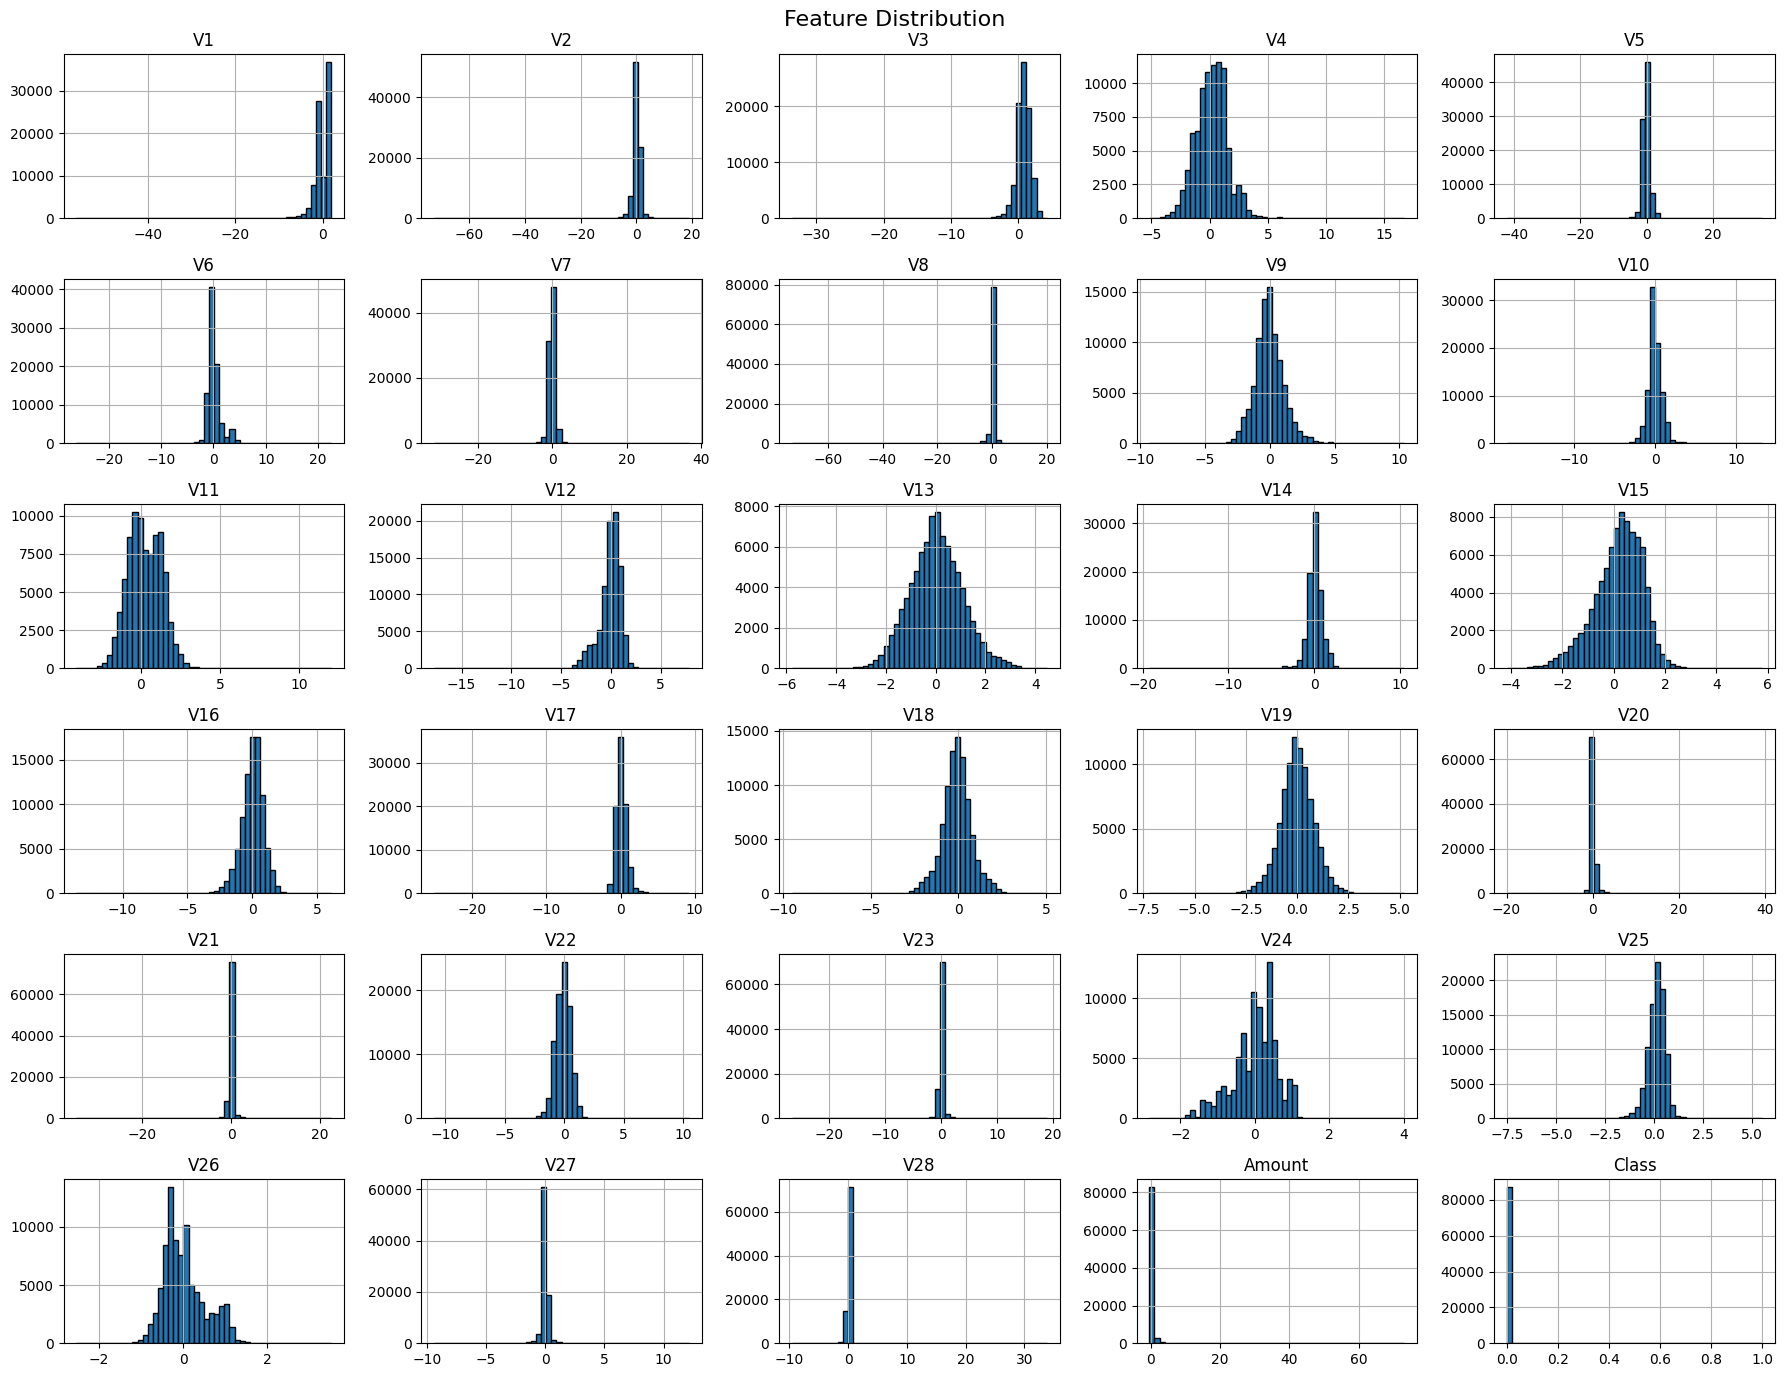

In [ ]:
plt.figure(figsize=(18,14))
df.hist(figsize=(18,14),bins=50,edgecolor='black')
plt.suptitle("Feature Distribution",fontsize=16)
plt.tight_layout() #Prevents overlapping of graphs
plt.show()

In [ ]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Standardizing amount column
df['Amount']=scaler.fit_transform(df[['Amount']])
print (df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Splitting feature and Target variables
x=df.drop(columns=['Class'])
y=df['Class']

#Training the Isolation Forest Model
iso_forest=IsolationForest(n_estimators=200,max_samples=0.8,contamination=0.005,random_state=42)
iso_forest.fit(x)

IsolationForest(contamination=0.005, max_samples=0.8, n_estimators=200,
                random_state=42)

In [ ]:
#Predicting anomalies
Predictions=iso_forest.predict(x)

#Convert predictions into labels
anomaly_labels=[1 if x==-1 else 0 for x in Predictions]

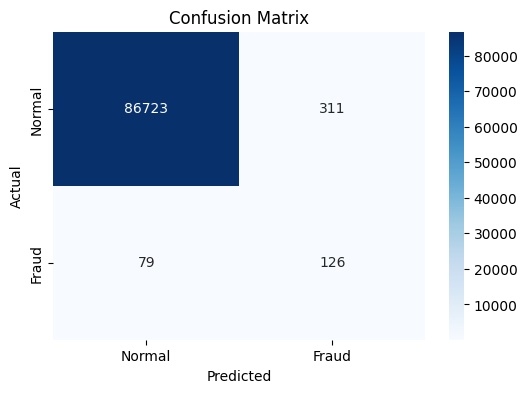

Confusion Matrix:
 [[86723   311]
 [   79   126]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     87034
         1.0       0.29      0.61      0.39       205

    accuracy                           1.00     87239
   macro avg       0.64      0.81      0.70     87239
weighted avg       1.00      1.00      1.00     87239


Model Accuracy: 0.9955


In [ ]:
#Model Evaluation
conf_matrix=confusion_matrix(y,anomaly_labels)
accuracy=accuracy_score(y,anomaly_labels)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:\n",confusion_matrix(y,anomaly_labels))
print("\nClassification Report:\n", classification_report(y,anomaly_labels))
print(f"\nModel Accuracy: {accuracy:.4f}")

🔍**Results of Isolation Forest Model:**


1) Precision (Fraud Detection): 0.29
  Only 29% of transactions flagged as fraud were actually fraud.
  High false positives cause lower precision.

2) Recall (Fraud Detection): 0.61
  Model correctly identifies 61% of actual fraud cases after tuning contamination value

3) Accuracy: ~99.8%
  Model shows high accuracy overall, partly due to class imbalance.

**One class SVM for fraud detection:**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [59]:
# Splitting features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [66]:
# One-Class SVM Model
oc_svm = OneClassSVM(kernel='rbf', nu=0.002, gamma='scale')
oc_svm.fit(x)

OneClassSVM(nu=0.002)

In [67]:
# Predicting anomalies
svm_predictions = oc_svm.predict(x)
svm_anomaly_labels = [1 if x == -1 else 0 for x in svm_predictions]

In [68]:
# Model Evaluation
svm_conf_matrix = confusion_matrix(y, svm_anomaly_labels)
svm_accuracy = accuracy_score(y, svm_anomaly_labels)
print("Confusion Matrix (One-Class SVM):\n", svm_conf_matrix)
print("\nClassification Report (One-Class SVM):\n", classification_report(y, svm_anomaly_labels))
print(f"\nOne-Class SVM Model Accuracy: {svm_accuracy:.4f}")

Confusion Matrix (One-Class SVM):
 [[86518   516]
 [  139    66]]

Classification Report (One-Class SVM):
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     87034
         1.0       0.11      0.32      0.17       205

    accuracy                           0.99     87239
   macro avg       0.56      0.66      0.58     87239
weighted avg       1.00      0.99      0.99     87239


One-Class SVM Model Accuracy: 0.9925


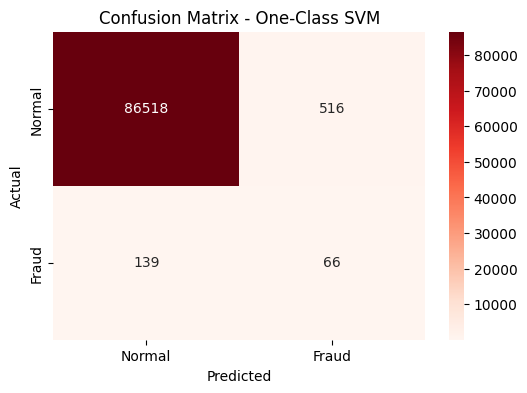

In [69]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - One-Class SVM")
plt.show()

**Results of one class SVM model:**

1) Accuracy: 99.25%

2) False Positives: 516 (Normal transactions misclassified as fraud)

3) False Negatives: 139 (Fraud cases missed)
Limitations: Low fraud precision indicates many false positives


**Key Takeaways**

✅ Isolation Forest performed better overall, with higher recall (61%) and precision (29%), meaning it detected more fraud cases while keeping false positives lower.

✅ One-Class SVM struggled with fraud detection, showing low precision (11%) and recall (32%), leading to more false positives and missed fraud cases.

✅ Accuracy is high in both models, but due to class imbalance, recall and precision are better evaluation metrics.

📌 Conclusion: Isolation Forest is the preferred model for this dataset as it balances fraud detection and false positive rates better than One-Class SVM.